In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import time

pd.set_option('display.max_columns', None)

In [2]:
player_info = pd.read_csv('data/Players.csv')
player_stats = pd.read_csv('data/player_data.csv')
season_stats = pd.read_csv('data/Seasons_Stats.csv')

### Tratando o dataset player_info

In [3]:
player_info.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [4]:
player_info.shape

(3922, 8)

In [5]:
rename_columns = {'Player': 'name', 'height': 'height_cm', 'weight': 'weight_kg', 'collage': 'college', 'born': 'year_of_birth'}
player_info = player_info.drop(columns=['Unnamed: 0'], axis=1)
player_info = player_info.rename(columns=rename_columns)
player_info.head()

,name,height_cm,weight_kg,college,year_of_birth,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [6]:
player_info.isnull().sum()

name               1
height_cm          1
weight_kg          1
college          349
year_of_birth      1
birth_city       470
birth_state      483
dtype: int64

In [7]:
player_info = player_info.drop(index=player_info[player_info.name.isnull()].index, axis=0)

In [8]:
player_info['year_of_birth'] = player_info.year_of_birth.astype(int)
player_info.head()

,name,height_cm,weight_kg,college,year_of_birth,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927,Hardinsburg,Kentucky


Text(0.5, 1.0, 'Estados aonde mais nasceram jogadores da NBA')

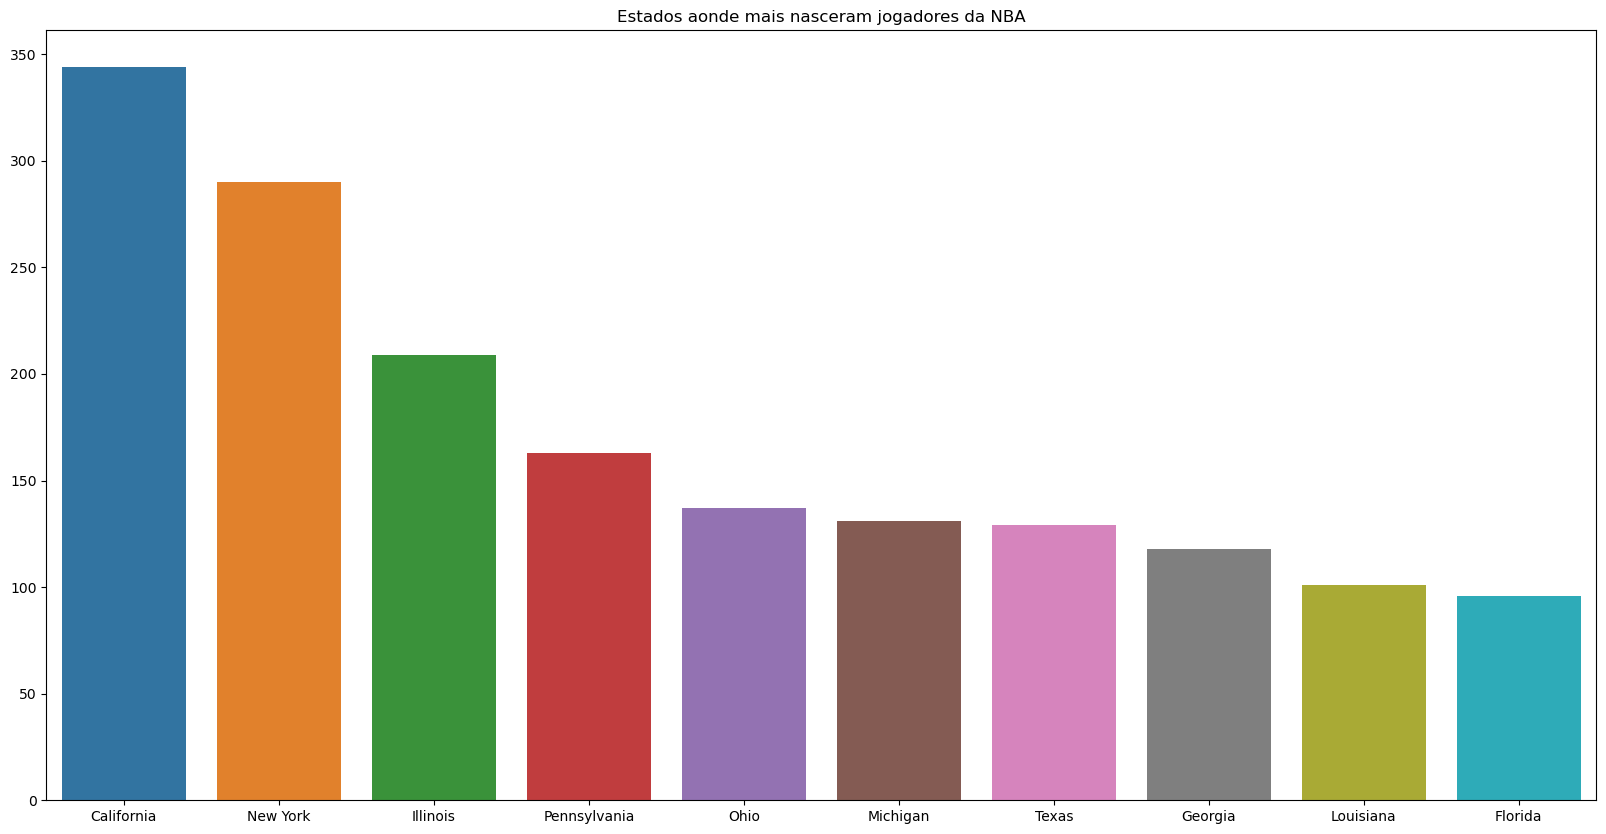

In [9]:
top10_bs = player_info.birth_state.value_counts().sort_values(ascending=False)[0:10]
plt.figure(figsize=(20,10))
sns.barplot(x=top10_bs.index, y=top10_bs.values)
plt.title('Estados aonde mais nasceram jogadores da NBA')

<AxesSubplot: xlabel='weight_kg', ylabel='height_cm'>

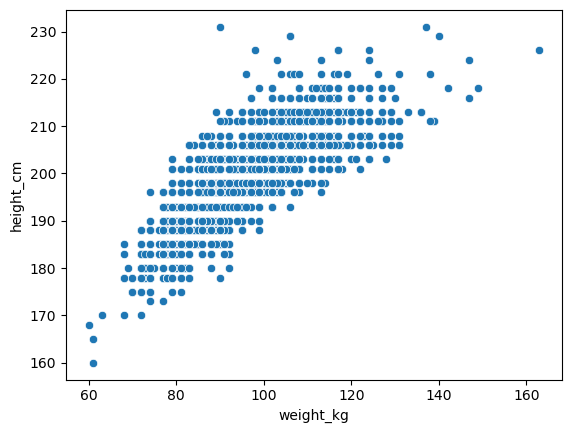

In [10]:
sns.scatterplot(data=player_info, y='height_cm', x='weight_kg')

### Tratando o dataset player_stats

In [11]:
player_stats.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [12]:
player_stats.shape

(4550, 8)

In [13]:
renamed_columns = {'height': 'height_ft', 'weight': 'weight_lb'}
player_stats = player_stats.rename(columns=renamed_columns)
player_stats.head()

,name,year_start,year_end,position,height_ft,weight_lb,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [14]:
player_stats.isnull().sum()

name            0
year_start      0
year_end        0
position        1
height_ft       1
weight_lb       6
birth_date     31
college       302
dtype: int64

In [15]:
player_stats = player_stats.drop(index=player_stats[player_stats.height_ft.isnull()].index, axis=0)

In [16]:
player_stats['birth_date'] = pd.to_datetime(player_stats.birth_date)
player_stats.head()

,name,year_start,year_end,position,height_ft,weight_lb,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University


In [17]:
def convert_ft_cm(height):
    feet = int(height.split('-')[0])
    inches = int(height.split('-')[1])
    height_converted = feet * 30.48 + inches * 2.54
    return round(height_converted,0)

In [18]:
def convert_lb_kg(weight):
    weight_converted = weight * 0.453592
    return round(weight_converted, 0)

In [19]:
player_stats['height_cm'] = player_stats.height_ft.map(convert_ft_cm)
player_stats['weight_kg'] = player_stats.weight_lb.map(convert_lb_kg)
player_stats.head()

,name,year_start,year_end,position,height_ft,weight_lb,birth_date,college,height_cm,weight_kg
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University,208.0,109.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University,206.0,107.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles",218.0,102.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University,185.0,73.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University,198.0,101.0


In [20]:
player_stats['birth_year'] = player_stats.birth_date.dt.year
player_stats.head()

,name,year_start,year_end,position,height_ft,weight_lb,birth_date,college,height_cm,weight_kg,birth_year
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University,208.0,109.0,1968.0
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University,206.0,107.0,1946.0
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles",218.0,102.0,1947.0
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University,185.0,73.0,1969.0
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University,198.0,101.0,1974.0


In [21]:
player_stats['age_debut'] = player_stats.year_start - player_stats.birth_year
player_stats['age_retirement'] = player_stats.year_end - player_stats.birth_year
player_stats['years_played'] = player_stats.year_end - player_stats.year_start
player_stats.head()

,name,year_start,year_end,position,height_ft,weight_lb,birth_date,college,height_cm,weight_kg,birth_year,age_debut,age_retirement,years_played
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,1968-06-24,Duke University,208.0,109.0,1968.0,23.0,27.0,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,1946-04-07,Iowa State University,206.0,107.0,1946.0,23.0,32.0,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,1947-04-16,"University of California, Los Angeles",218.0,102.0,1947.0,23.0,42.0,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,1969-03-09,Louisiana State University,185.0,73.0,1969.0,22.0,32.0,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,1974-11-03,San Jose State University,198.0,101.0,1974.0,24.0,29.0,5


<Figure size 2000x1000 with 0 Axes>

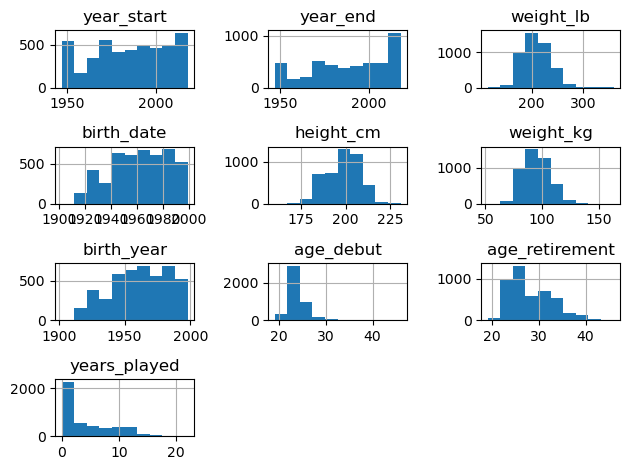

In [22]:
plt.figure(figsize=(20,10))
player_stats.hist()
plt.tight_layout()
plt.show()


In [23]:
player_stats.isnull().sum()

name                0
year_start          0
year_end            0
position            0
height_ft           0
weight_lb           5
birth_date         31
college           302
height_cm           0
weight_kg           5
birth_year         31
age_debut          31
age_retirement     31
years_played        0
dtype: int64

Text(0.5, 1.0, 'Quantidade de jogadores por anos jogados')

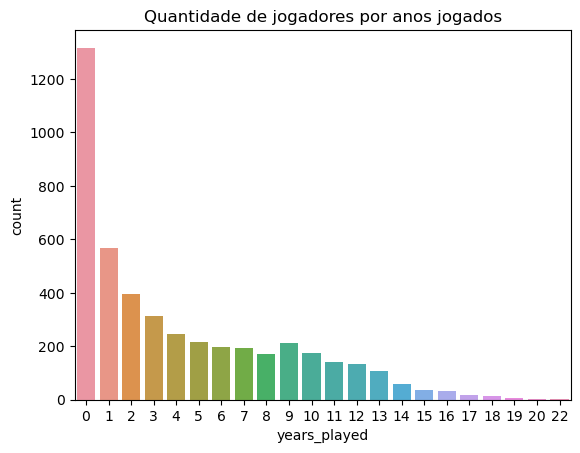

In [24]:
sns.countplot(data=player_stats, x='years_played')
plt.title('Quantidade de jogadores por anos jogados')

In [25]:
# Ano que os jogadores que jogaram menos de 1 ano na NBA entraram
year_played_0 = player_stats.loc[player_stats.years_played == 0].year_start
year_played_0.value_counts(ascending=False)

2018    90
1947    87
1968    68
1950    60
1971    42
        ..
1960     4
1965     3
1966     2
1961     2
1967     1
Name: year_start, Length: 72, dtype: int64

2018 é o ano com mais players que jogaram menos de 1 ano porque o dataset termina 2018, iremos tirar 2018 da lista.

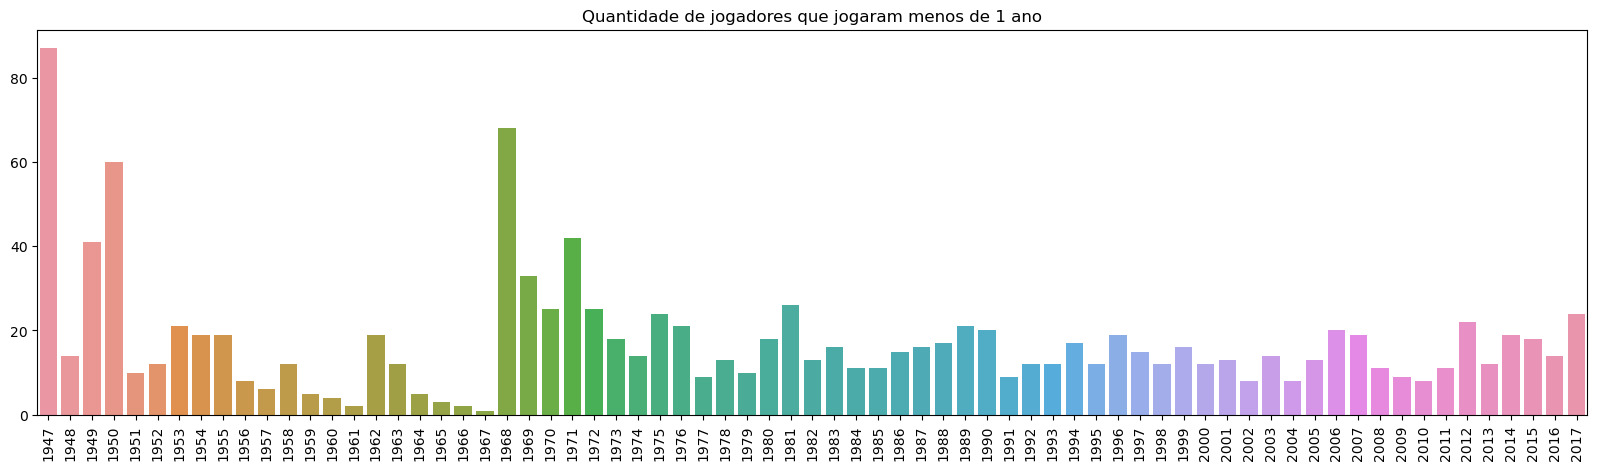

In [26]:
plt.figure(figsize=(20,5))
year_played_0 = player_stats.loc[(player_stats.years_played == 0) & (player_stats.year_start != 2018)].year_start
sns.barplot(x = year_played_0.value_counts().index, y=year_played_0.value_counts().values)
plt.xticks(rotation=90)
plt.title('Quantidade de jogadores que jogaram menos de 1 ano')
plt.show()

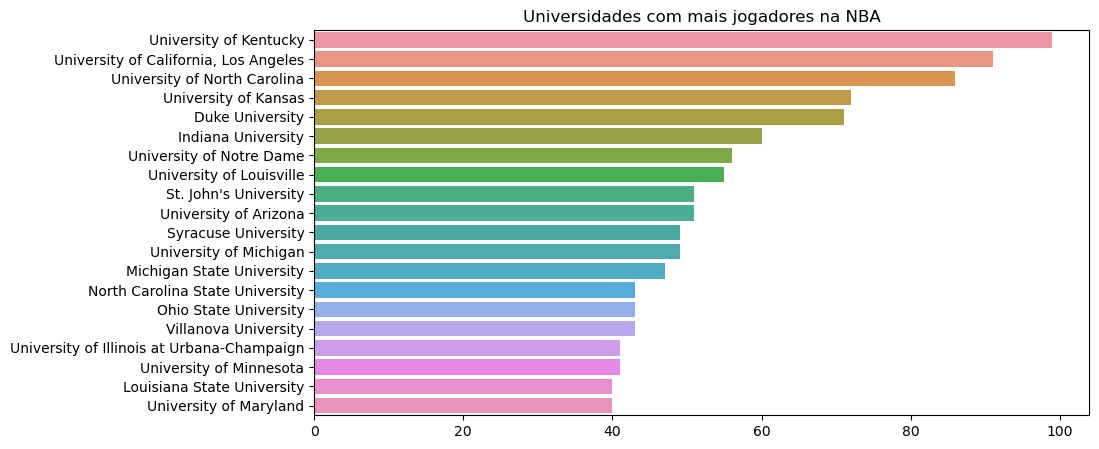

In [27]:
plt.figure(figsize=(10,5))
players_per_college = player_stats.college.value_counts()[:20]
sns.barplot(y = players_per_college.index, x=players_per_college.values)
plt.title('Universidades com mais jogadores na NBA')
plt.show()

In [28]:
# Por ano de entrada, qual foi a média de anos que o jogador jogou
years_played_by_startyear = player_stats.groupby('year_start').years_played.mean()
years_played_by_startyear

year_start
1947    1.378882
1948    2.275000
1949    1.808511
1950    1.666667
1951    3.466667
          ...   
2014    2.307692
2015    1.902439
2016    1.438356
2017    0.727273
2018    0.000000
Name: years_played, Length: 72, dtype: float64

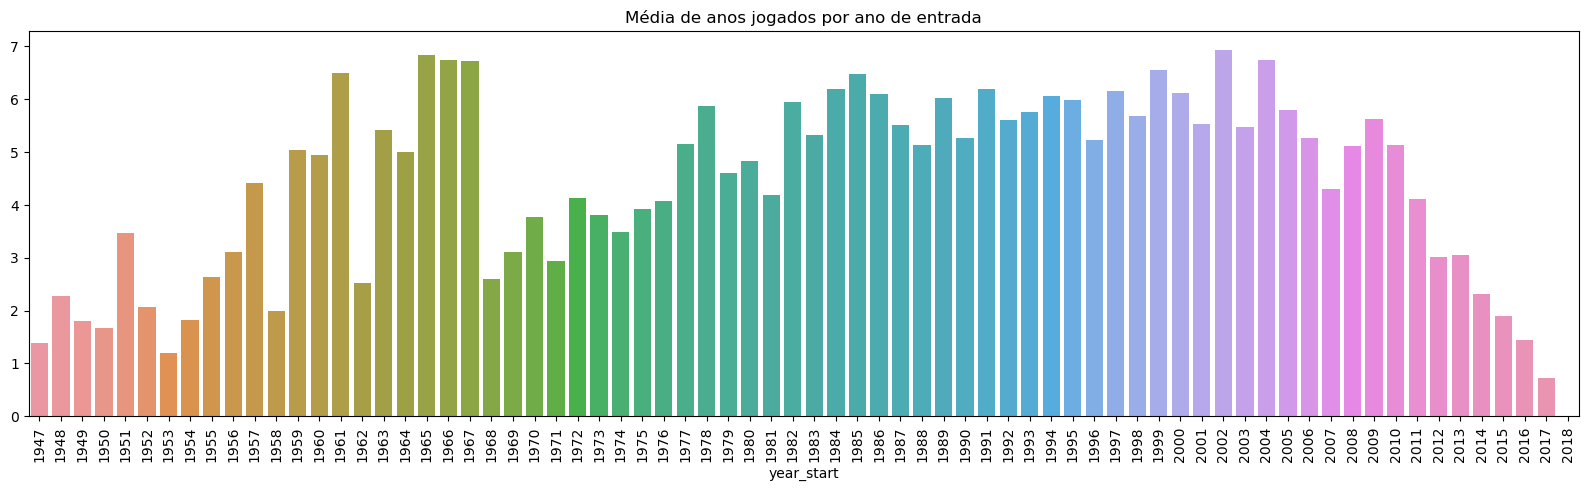

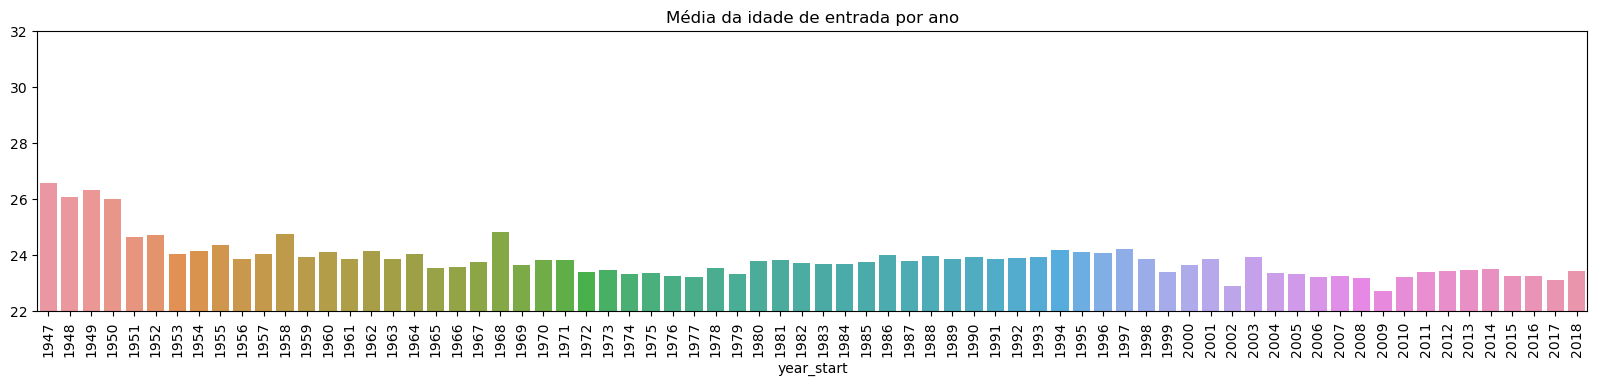

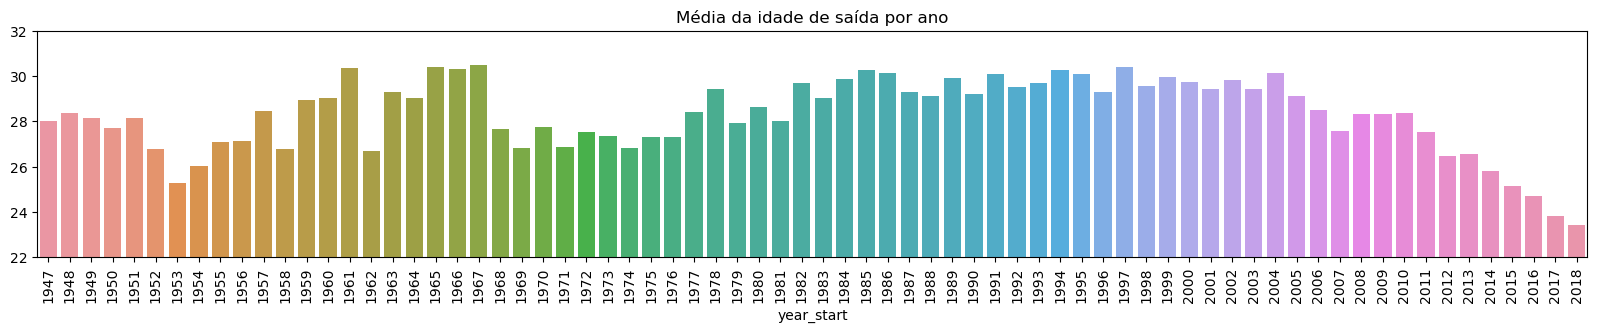

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,1,1)
sns.barplot(x = years_played_by_startyear.index, y=years_played_by_startyear.values)
plt.xticks(rotation=90)
plt.title('Média de anos jogados por ano de entrada')
plt.show()

avg_agedebut_year = player_stats.groupby('year_start').age_debut.mean()
plt.figure(figsize=(20,8))
plt.subplot(2,1,2)
sns.barplot(x = avg_agedebut_year.index, y=avg_agedebut_year.values)
plt.xticks(rotation=90)
plt.title('Média da idade de entrada por ano')
plt.ylim(22,32)
plt.show()

avg_retirement_year = player_stats.groupby('year_start').age_retirement.mean()
plt.figure(figsize=(20,10))
plt.subplot(3,1,3)
sns.barplot(x = avg_retirement_year.index, y=avg_retirement_year.values)
plt.xticks(rotation=90)
plt.title('Média da idade de saída por ano')
plt.ylim(22,32)
plt.show()

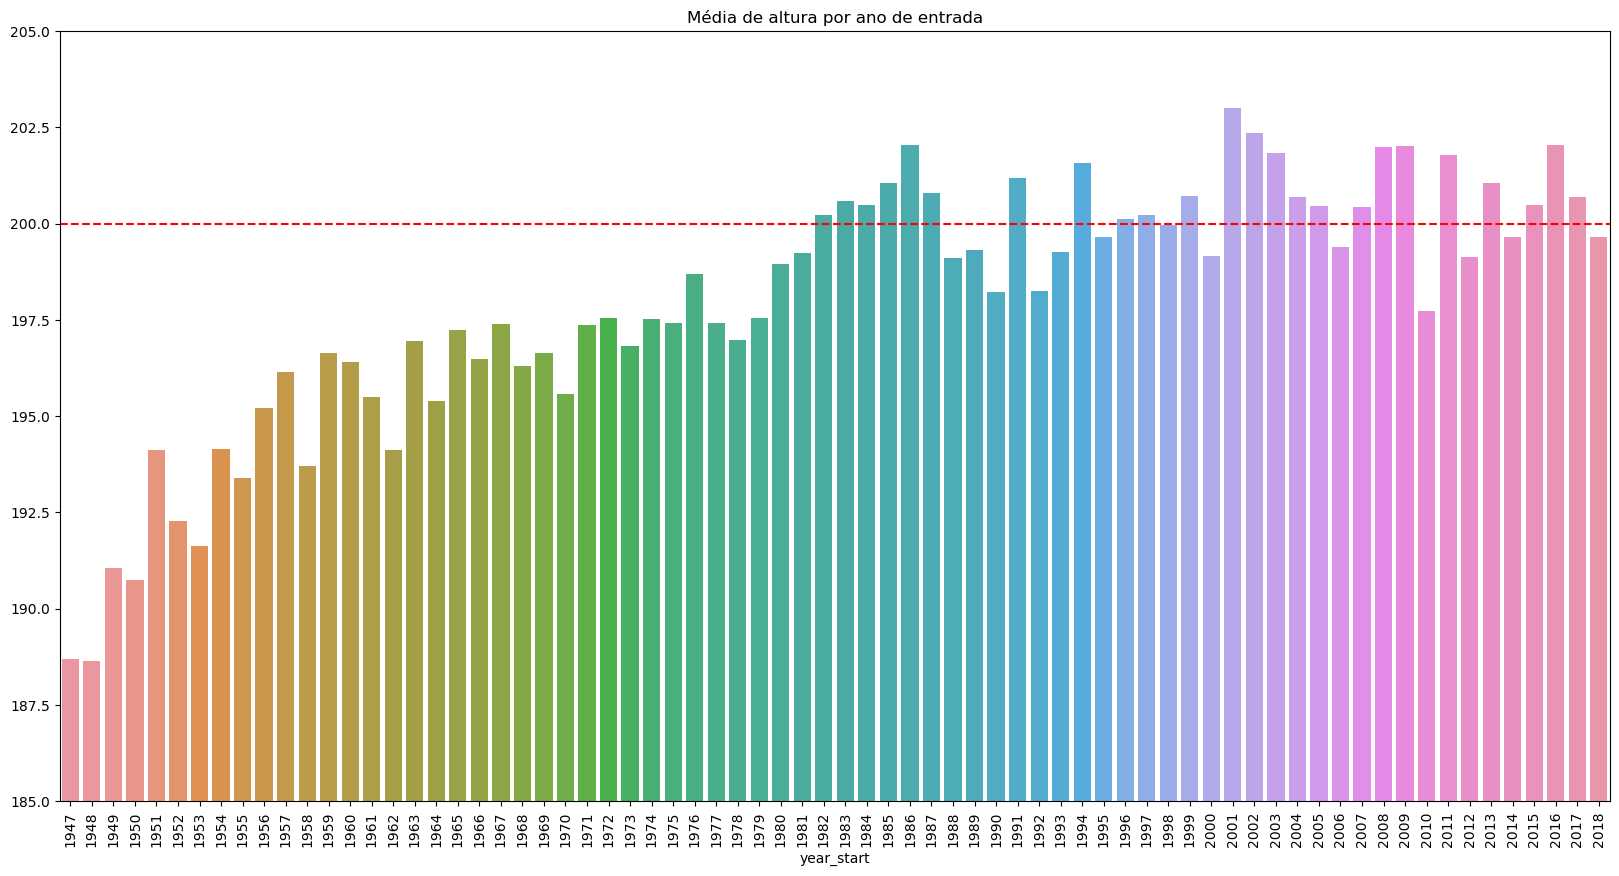

In [30]:
avg_height_year = player_stats.groupby('year_start').height_cm.mean()
plt.figure(figsize=(20,10))
sns.barplot(x = avg_height_year.index, y=avg_height_year.values)
plt.xticks(rotation=90)
plt.title('Média de altura por ano de entrada')
plt.ylim(185,205)
plt.axhline(y = 200, color = 'r', linestyle = 'dashed')
plt.show()

Text(0.5, 1.0, 'Altura por posição jogada')

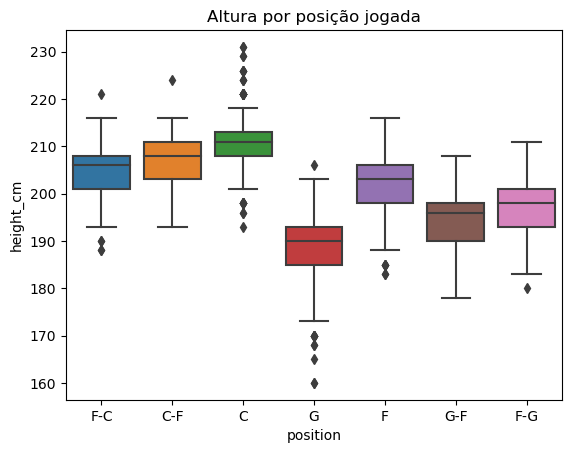

In [31]:
sns.boxplot(data=player_stats, x='position', y='height_cm')
plt.title('Altura por posição jogada')

C:\Users\danil\AppData\Local\Temp\ipykernel_85404\4078260556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(player_stats.corr())


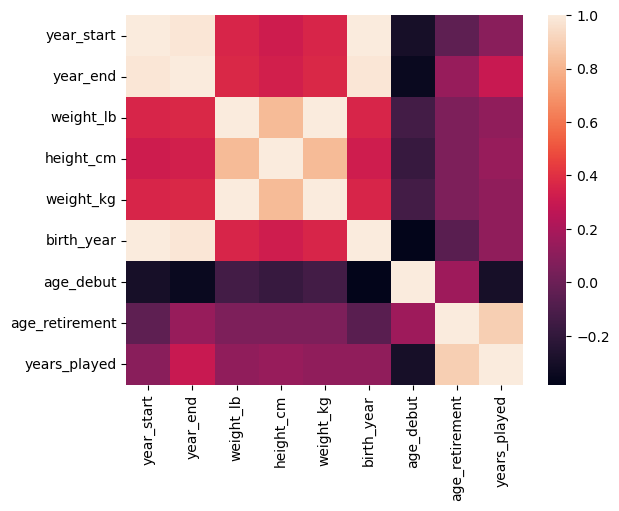

In [32]:
sns.heatmap(player_stats.corr())
plt.show()

### Tratando o dataset season_stats

In [33]:
season_stats.tail()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,NaN,3.4,2.2,5.6,0.157,NaN,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,NaN,0.5,0.6,1.0,0.094,NaN,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,NaN,-0.1,0.1,0.0,-0.005,NaN,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,NaN,-0.3,0.8,0.5,0.030,NaN,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,0.013,0.206,7.1,21.9,14.3,8.1,1.1,4.4,10.4,20.3,NaN,0.6,0.5,1.1,0.086,NaN,-2.7,0.3,-2.5,-0.1,126.0,238.0,0.529,0.0,3.0,0.000,126.0,235.0,0.536,0.529,32.0,49.0,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [34]:
season_stats.shape

(24691, 53)

In [35]:
season_stats.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [36]:
season_stats = season_stats.drop(index=season_stats[season_stats.Player.isnull()].index, axis=0)

#### Para verificar o significado de cada coluna acesse: https://www.basketball-reference.com/about/glossary.html

In [37]:
season_stats = season_stats.drop(columns=['Unnamed: 0','blanl','blank2'], axis=1)
season_stats.tail()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,0.5,0.6,1.0,0.094,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,0.013,0.206,7.1,21.9,14.3,8.1,1.1,4.4,10.4,20.3,0.6,0.5,1.1,0.086,-2.7,0.3,-2.5,-0.1,126.0,238.0,0.529,0.0,3.0,0.000,126.0,235.0,0.536,0.529,32.0,49.0,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [38]:
season_stats.Pos.unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       'PF-C', 'SF-SG', 'C-PF', 'SG-SF', 'PF-SF', 'SF-PF', 'SG-PG',
       'SF-PG', 'C-SF', 'PG-SG', 'PG-SF', 'SG-PF'], dtype=object)

In [39]:
groupby_players = season_stats.groupby('Player').agg({'2P' : 'sum', '3P' : 'sum','2PA' : 'sum', '3PA' : 'sum' ,'PTS' : ['sum', 'mean']})
groupby_players

2P     3P     2PA    3PA      PTS             
                       sum    sum     sum    sum      sum         mean
Player                                                                
A.C. Green          4653.0  125.0  9177.0  509.0  12928.0   718.222222
A.J. Bramlett          4.0    0.0    21.0    0.0      8.0     8.000000
A.J. English         608.0    9.0  1353.0   65.0   1502.0   751.000000
A.J. Guyton           93.0   73.0   247.0  193.0    442.0   147.333333
A.J. Hammons          12.0    5.0    32.0   10.0     48.0    48.000000
...                    ...    ...     ...    ...      ...          ...
Zelmo Beaty*        3396.0    0.0  7237.0    0.0   9107.0  1138.375000
Zendon Hamilton      183.0    0.0   414.0    0.0    611.0    76.375000
Zoran Dragic          16.0    6.0    32.0   28.0     56.0    18.666667
Zoran Planinic       160.0   37.0   358.0  128.0    561.0   187.000000
Zydrunas Ilgauskas  4176.0   31.0  8742.0  100.0  10976.0   844.307692

[3921 rows x 6 columns]

Text(0.5, 0, 'Quantidade total de pontos')

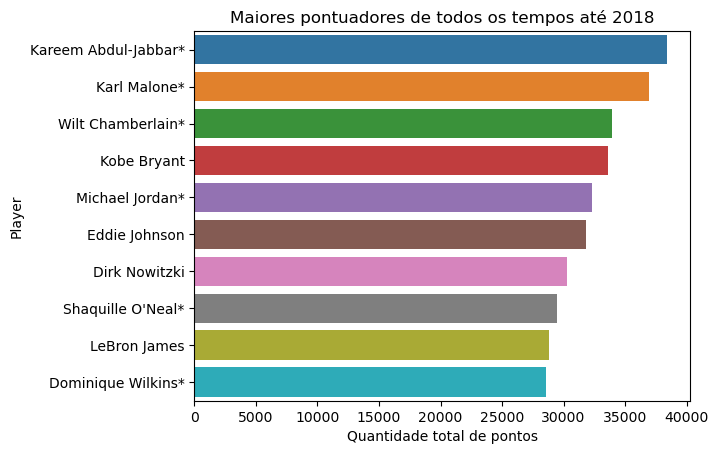

In [40]:
top_players_points = groupby_players.PTS['sum'].sort_values(ascending=False)[0:10]
sns.barplot(x = top_players_points.values, y =top_players_points.index)
plt.title('Maiores pontuadores de todos os tempos até 2018')
plt.xlabel('Quantidade total de pontos')


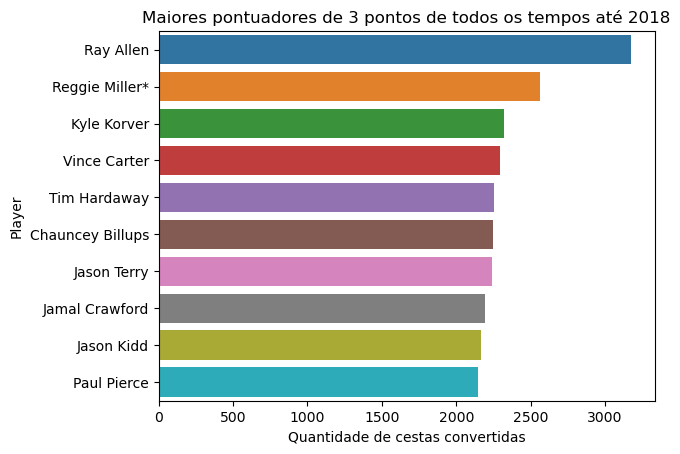

In [41]:
top_players_3p = groupby_players['3P']['sum'].sort_values(ascending=False)[0:10]
sns.barplot(x = top_players_3p.values, y =top_players_3p.index)
plt.title('Maiores pontuadores de 3 pontos de todos os tempos até 2018')
plt.xlabel('Quantidade de cestas convertidas')
plt.show()

Text(0.5, 1.0, 'Porcentagem de aproveitamento em cestas de 3 pontos')

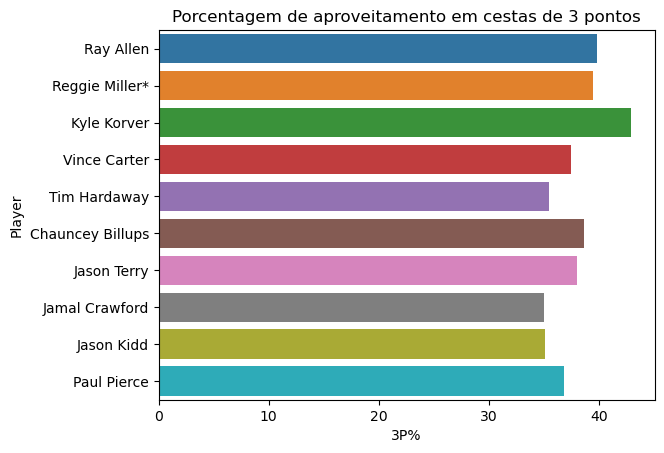

In [42]:
top10_3p = groupby_players.loc[top_players_3p.index]
top10_3p['3P%'] = top10_3p['3P'] / top10_3p['3PA'] * 100
sns.barplot(data=top10_3p, x='3P%', y =top_players_3p.index)
plt.title('Porcentagem de aproveitamento em cestas de 3 pontos')

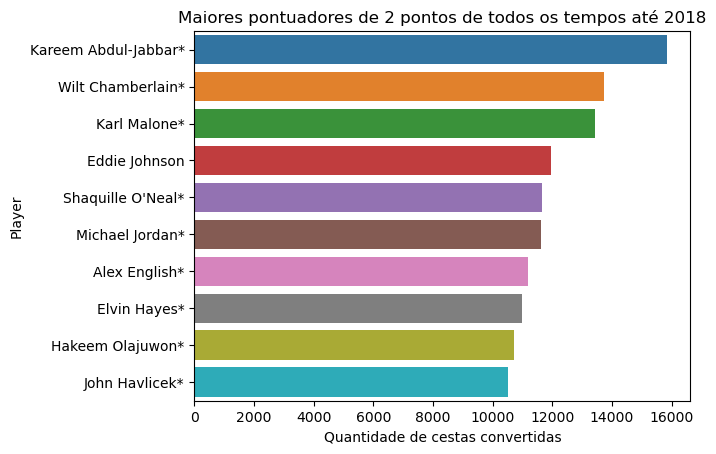

In [43]:
top_players_2p = groupby_players['2P']['sum'].sort_values(ascending=False)[0:10]
sns.barplot(x = top_players_2p.values, y =top_players_2p.index)
plt.title('Maiores pontuadores de 2 pontos de todos os tempos até 2018')
plt.xlabel('Quantidade de cestas convertidas')
plt.show()

Text(0.5, 1.0, 'Porcentagem de aproveitamento em cestas de 2 pontos')

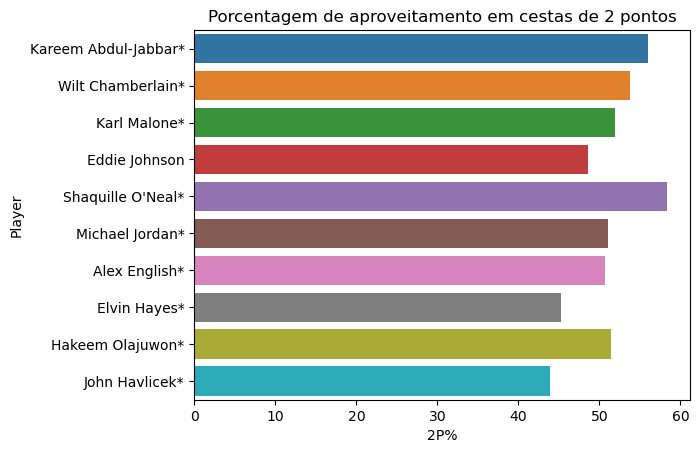

In [44]:
top10_2p = groupby_players.loc[top_players_2p.index]
top10_2p['2P%'] = top10_2p['2P'] / top10_2p['2PA'] * 100
sns.barplot(data=top10_2p, x='2P%', y =top_players_2p.index)
plt.title('Porcentagem de aproveitamento em cestas de 2 pontos')


C:\Users\danil\AppData\Local\Temp\ipykernel_85404\3573588801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(season_stats.corr())


<AxesSubplot: >

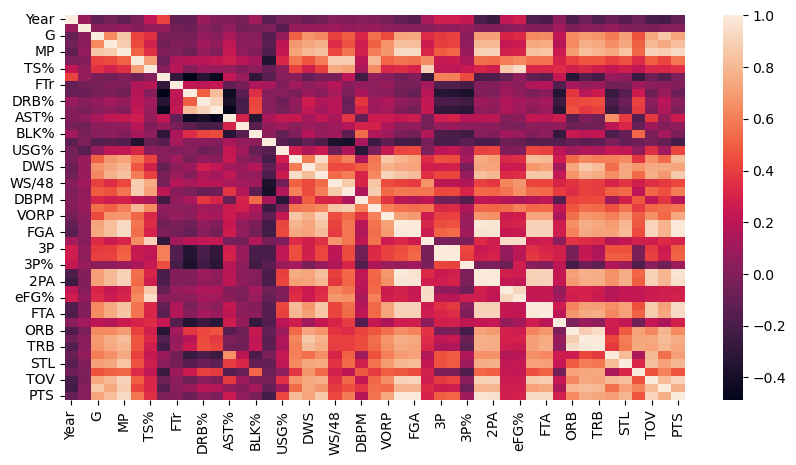

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(season_stats.corr())

In [46]:
# Analisando o jogador
KAJ = season_stats.loc[season_stats.Player == 'Kareem Abdul-Jabbar*']


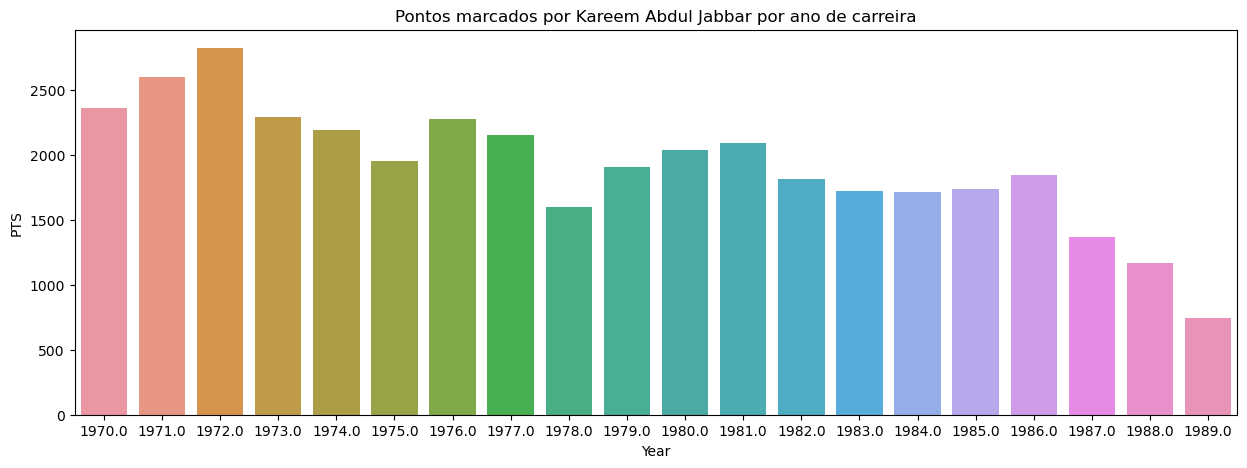

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(KAJ, x='Year', y='PTS')
plt.title('Pontos marcados por Kareem Abdul Jabbar por ano de carreira')
plt.show()

In [48]:
season_stats.loc[season_stats.Player.isnull()]

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


Iremos agora tentar prever se o jogador, baseado em seus stats, seria considerado um all star ou não. Para isso precisamos coletar dos dados já existentes, quem já foi um all star. Iremos realizar um webscraping do site https://www.basketball-reference.com/ com os nomes dos jogadores listados no dataframe season_stats.

In [49]:
# Pegando o nome dos jogadores
players_name = list(season_stats.Player.unique())
players_name

['Curly Armstrong',
 'Cliff Barker',
 'Leo Barnhorst',
 'Ed Bartels',
 'Ralph Beard',
 'Gene Berce',
 'Charlie Black',
 'Nelson Bobb',
 'Jake Bornheimer',
 'Vince Boryla',
 'Don Boven',
 'Harry Boykoff',
 'Joe Bradley',
 'Bob Brannum',
 'Carl Braun',
 'Frankie Brian',
 'Price Brookfield',
 'Bob Brown',
 'Jim Browne',
 'Walt Budko',
 'Jack Burmaster',
 'Tommy Byrnes',
 'Bill Calhoun',
 'Don Carlson',
 'Bob Carpenter',
 'Jake Carter',
 'Al Cervi*',
 'John Chaney',
 'Leroy Chollet',
 'Bill Closs',
 'Paul Cloyd',
 'Jack Coleman',
 'Bobby Cook',
 'Ray Corley',
 'Jack Cotton',
 'Dillard Crocker',
 'Chink Crossin',
 'Fran Curran',
 'Jimmy Darden',
 'Bob Davies*',
 'Hook Dillon',
 'Earl Dodd',
 'Joe Dolhon',
 'Bob Doll',
 'Harry Donovan',
 'Andy Duncan',
 'Dike Eddleman',
 'Gene Englund',
 'Bob Evans',
 'Johnny Ezersky',
 'Bob Feerick',
 'George Feigenbaum',
 'Arnie Ferrin',
 'Jerry Fleishman',
 'Joe Fulks*',
 'Bill Gabor',
 'Elmer Gainer',
 'Harry Gallatin*',
 'Vern Gardner',
 'Frank Gates',


In [50]:
season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,0.002,0.442,8.6,17.3,12.9,9.1,1.8,3.0,10.9,15.5,3.4,2.2,5.6,0.157,-0.2,2.3,2.1,1.8,253.0,443.0,0.571,0.0,1.0,0.000,253.0,442.0,0.572,0.571,133.0,196.0,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,0.006,0.247,9.2,17.0,13.2,12.2,0.7,3.3,10.2,16.5,0.5,0.6,1.0,0.094,-3.2,0.8,-2.5,-0.1,78.0,158.0,0.494,0.0,1.0,0.000,78.0,157.0,0.497,0.494,22.0,39.0,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10.0,31.0,0.323,0.0,0.0,NaN,10.0,31.0,0.323,0.323,3.0,5.0,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88.0,221.0,0.398,33.0,99.0,0.333,55.0,122.0,0.451,0.473,31.0,40.0,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [51]:
links = []
links_repetidos = []

for name in players_name:
    name_changed = name.replace('.','').replace("'","").replace('*','').replace('-','').lower().strip().split(' ')
    fn = name_changed[0] #pega o primeiro nome
    ln = name_changed[1] #pega o sobrenome
    link_name  = ln[:5] + fn[:2] #transforma o nome em uma string que é utilizada para buscar o jogador na página
    links.append(link_name)

contagem = {} #cria um dicionário para verificar quantos players utilizam o mesmo nome de link
for l in set(links): 
    contagem[l] = links.count(l) #conta quantos l foram achados em links

lista_link = []
for key, value in contagem.items():
    for i in range(value):
        lista_link.append(key+'0'+str(i+1)) #adiciona a lista final com a formatação certa

In [52]:
lista_link.sort()
lista_link

['abdelal01',
 'abdulka01',
 'abdulma01',
 'abdulta01',
 'abdulza01',
 'abdursh01',
 'abernto01',
 'ablefo01',
 'abrinal01',
 'ackeral01',
 'ackerdo01',
 'acresma01',
 'actonbu01',
 'acyqu01',
 'adamsal01',
 'adamsdo01',
 'adamsha01',
 'adamsjo01',
 'adamsmi01',
 'adamsst01',
 'addisra01',
 'adelmri01',
 'adrieje01',
 'afflaar01',
 'agerma01',
 'aguirma01',
 'ahearbl01',
 'aingeda01',
 'ajincal01',
 'akinhe01',
 'akognjo01',
 'alabiso01',
 'alarima01',
 'alcorga01',
 'aldemfu01',
 'aldrico01',
 'aldrila01',
 'aleksch01',
 'alexacl01',
 'alexaco01',
 'alexaco02',
 'alexaga01',
 'alexajo01',
 'alexavi01',
 'alforst01',
 'allenbo01',
 'allenje01',
 'allenla01',
 'allenlu01',
 'allenma01',
 'allenra01',
 'allenra02',
 'allento01',
 'allisod01',
 'allrela01',
 'allumda01',
 'almonmo01',
 'alstode01',
 'alstora01',
 'alumape01',
 'amaecjo01',
 'amayaas01',
 'aminual01',
 'amundlo01',
 'anderal01',
 'anderan01',
 'anderbo01',
 'anderch01',
 'andercl01',
 'anderda01',
 'anderda02',
 'anderde01

In [53]:
def make_request(link, header):
    
    time.sleep(5) 
    response = requests.get(link, headers=header)
    if response.status_code == 429:
        retry_after = int(response.headers.get("Retry-After", 30))  #Retry-After retorna quantos segundos é preciso esperar para 
        print("Received 429, sleeping for", retry_after, "seconds") #tentar novamente e não dar erro, caso não esteja especificado no header, 
        time.sleep(retry_after)                                     #considerar 30 segundos
        return make_request(link, header)
    return response


In [54]:
# Scraper do site para conseguir coletar os anos que cada jogador jogou o all star game

player_ano_all_star = {}
player_error_indice = []

headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36 Edg/109.0.1518.61'
}

indice = 0

for player in lista_link:

    url = f'https://www.basketball-reference.com/players/{player[0]}/{player}.html'
    
    response = make_request(url, headers)
    
    print(f'lista_link[{indice}]')
    
    if response.status_code == 200:
        
        response_text = response.text

        soup = BeautifulSoup(response_text, 'lxml')

        try:
            name = soup.find('div', id='info', class_='players').find('h1').span.text

            all_star = soup.find('table', id='per_game', class_='stats_table').tbody.find_all('tr')
            
            anos_all_star = []
            for all in all_star:
                try:
                    ano = int(all.th.a.text.split("-")[0])+1  #pega a string '1980-81' e formata transformando em 1981
                    star = str(all.th.span) #verifica se possui estrela
                except:
                    continue

                if star == '<span class="sr_star"></span>' and ano < 2018:
                    anos_all_star.append(str(ano)+'-1') #1 - foi all star aquele ano
                else: 
                    anos_all_star.append(str(ano)+'-0') #0 - não foi all star aquele ano

            player_ano_all_star[name] = anos_all_star
            indice += 1
        
        except Exception as e:  #tratamento de erro para quando já estiver dentro da página - indica erro por não encontrar a formatação certa
            print(f'erro em lista_link[{indice}]')
            print(f'erro : {e}')
            player_error_indice.append(indice)
            indice += 1
            continue

    else: #tratamento de erro para por não encontrar a página
        print(f'erro em lista_link[{indice}]')
        print(f'erro : {response}')
        player_error_indice.append(indice)
        indice += 1

lista_link[0]
lista_link[1]
lista_link[2]
lista_link[3]
lista_link[4]
lista_link[5]
lista_link[6]
lista_link[7]
lista_link[8]
lista_link[9]
lista_link[10]
lista_link[11]
lista_link[12]
lista_link[13]
lista_link[14]
lista_link[15]
lista_link[16]
lista_link[17]
lista_link[18]
lista_link[19]
lista_link[20]
lista_link[21]
lista_link[22]
lista_link[23]
lista_link[24]
lista_link[25]
lista_link[26]
lista_link[27]
lista_link[28]
lista_link[29]
lista_link[30]
lista_link[31]
lista_link[32]
lista_link[33]
lista_link[34]
lista_link[35]
lista_link[36]
lista_link[37]
lista_link[38]
lista_link[39]
lista_link[40]
lista_link[41]
lista_link[42]
lista_link[43]
lista_link[44]
lista_link[45]
lista_link[46]
lista_link[47]
lista_link[48]
lista_link[49]
lista_link[50]
lista_link[51]
lista_link[52]
lista_link[53]
lista_link[54]
lista_link[55]
lista_link[56]
lista_link[57]
lista_link[58]
lista_link[59]
lista_link[60]
lista_link[61]
lista_link[62]
lista_link[63]
lista_link[64]
lista_link[65]
lista_link[66]
lista

In [55]:
player_ano_all_star

{'Alaa Abdelnaby': ['1991-0',
  '1992-0',
  '1993-0',
  '1993-0',
  '1993-0',
  '1994-0',
  '1995-0',
  '1995-0',
  '1995-0'],
 'Kareem Abdul-Jabbar': ['1970-1',
  '1971-1',
  '1972-1',
  '1973-1',
  '1974-1',
  '1975-1',
  '1976-1',
  '1977-1',
  '1978-0',
  '1979-1',
  '1980-1',
  '1981-1',
  '1982-1',
  '1983-1',
  '1984-1',
  '1985-1',
  '1986-1',
  '1987-1',
  '1988-1',
  '1989-1'],
 'Walt Hazzard': ['1965-0',
  '1966-0',
  '1967-0',
  '1968-1',
  '1969-0',
  '1970-0',
  '1971-0',
  '1972-0',
  '1973-0',
  '1973-0',
  '1973-0',
  '1974-0'],
 'Tariq Abdul-Wahad': ['1998-0',
  '1999-0',
  '2000-0',
  '2000-0',
  '2000-0',
  '2001-0',
  '2002-0',
  '2002-0',
  '2002-0',
  '2003-0'],
 'Zaid Abdul-Aziz': ['1969-0',
  '1969-0',
  '1969-0',
  '1970-0',
  '1971-0',
  '1972-0',
  '1973-0',
  '1974-0',
  '1975-0',
  '1976-0',
  '1977-0',
  '1978-0',
  '1978-0',
  '1978-0'],
 'Shareef Abdur-Rahim': ['1997-0',
  '1998-0',
  '1999-0',
  '2000-0',
  '2001-0',
  '2002-1',
  '2003-0',
  '2004-0',

In [69]:
for i in player_error_indice:
    print(lista_link[i])

ayresje01
bareajj01
barryjo02
bonge01
bwo01
capelcl01
carloju01
delvi01
dena01
eichhri01
el-amkh01
hairspj01
hazzawa01
hoguepa01
hugheal01
ilungdi01
johnpe01
jojo01
jolliho01
kidd-mi01
leeed01
mbahlu01
michaja01
munfoxa01
pavlosa01
putmado01
raybi01
raymi01
rodho01
senemo01
smithto01
tavared01
tormoge01
vanbu01
vandi01
vanja01
vanke01
vanni01
vanno01
vanto01
vinicma01
vonwh01
wahwa01
walkehe01
walleta01
willimo02
worldme01


In [56]:
all_star = pd.DataFrame({'player': player_ano_all_star.keys(), 'year': player_ano_all_star.values()})
all_star

,player,year
0,Alaa Abdelnaby,"[1991-0, 1992-0, 1993-0, 1993-0, 1993-0, 1994-..."
1,Kareem Abdul-Jabbar,"[1970-1, 1971-1, 1972-1, 1973-1, 1974-1, 1975-..."
2,Walt Hazzard,"[1965-0, 1966-0, 1967-0, 1968-1, 1969-0, 1970-..."
3,Tariq Abdul-Wahad,"[1998-0, 1999-0, 2000-0, 2000-0, 2000-0, 2001-..."
4,Zaid Abdul-Aziz,"[1969-0, 1969-0, 1969-0, 1970-0, 1971-0, 1972-..."
...,...,...
3862,Stephen Zimmerman,[2017-0]
3863,Paul Zipser,"[2017-0, 2018-0]"
3864,Jim Zoet,[1983-0]
3865,Bill Zopf,[1971-0]


In [57]:
anos = all_star.year

In [58]:
anos_separados = [] #separa cada ano em um elemento da lista
tamanho_anos = []  #quantos anos cada jogador jogou na liga
for ano in anos:
    tamanho_anos.append(len(ano))
    for a in ano:
        anos_separados.append(a)

In [59]:
allstar = all_star.loc[all_star.index.repeat(tamanho_anos)].reset_index(drop=True)
allstar.year = anos_separados
allstar

,player,year
0,Alaa Abdelnaby,1991-0
1,Alaa Abdelnaby,1992-0
2,Alaa Abdelnaby,1993-0
3,Alaa Abdelnaby,1993-0
4,Alaa Abdelnaby,1993-0
...,...,...
27058,Ivica Zubac,2019-0
27059,Ivica Zubac,2020-0
27060,Ivica Zubac,2021-0
27061,Ivica Zubac,2022-0


In [60]:
allstar['all_star'] = allstar.year.apply(lambda x: int(x[-1]))
allstar['year'] = allstar.year.apply(lambda x: x.split('-')[0]).astype(int)
allstar.head()

,player,year,all_star
0,Alaa Abdelnaby,1991,0
1,Alaa Abdelnaby,1992,0
2,Alaa Abdelnaby,1993,0
3,Alaa Abdelnaby,1993,0
4,Alaa Abdelnaby,1993,0


In [61]:
allstar = allstar.drop(index=allstar[allstar.year > 2017].index).reset_index(drop=True)

In [62]:
allstar

,player,year,all_star
0,Alaa Abdelnaby,1991,0
1,Alaa Abdelnaby,1992,0
2,Alaa Abdelnaby,1993,0
3,Alaa Abdelnaby,1993,0
4,Alaa Abdelnaby,1993,0
...,...,...,...
24926,Stephen Zimmerman,2017,0
24927,Paul Zipser,2017,0
24928,Jim Zoet,1983,0
24929,Bill Zopf,1971,0


In [70]:
allstar.to_csv('data/all_stars.csv', sep=';',encoding='UTF-8', index=False)